In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
design_height = 25/1000

In [8]:
wall_thickness = 1/1000
n_cell = 5
relative_density = 0.5

In [11]:
t_over_l = (np.sqrt(3) - np.sqrt(3-3*relative_density))/3
cell_size = design_height/(n_cell + t_over_l*2/np.sqrt(3))
wall_thickness = cell_size*t_over_l
wall_thickness

0.0008137316942707492

In [12]:
2*np.sqrt(3)*(wall_thickness/cell_size)-3*(wall_thickness/cell_size)**2

0.4999999999999999

In [6]:
(design_height - 2/np.sqrt(3)*wall_thickness)/n_cell

0.0047690598923241494

In [ ]:

for n_cell in range(2, 8):
    for relative_density in np.arange(0.05, 0.55, 0.05):
        t_over_l = np.sqrt(3)/2 - np.sqrt(3 - 4*relative_density)/2
        cell_size = design_height/(np.sqrt(3)*n_cell + t_over_l)
        wall_thickness = cell_size*t_over_l

        external_wall = True
        external_wall_thickness = wall_thickness
        if wall_thickness*1000 < 0.8:
            continue
        print(f"Cell Count: {n_cell}\tRho: {relative_density:1.2f}\tWall thickness: {wall_thickness*1000:1.3f}")

Cell Count: 3	Rho: 0.30	Wall thickness: 0.905
Cell Count: 3	Rho: 0.35	Wall thickness: 1.075
Cell Count: 3	Rho: 0.40	Wall thickness: 1.254
Cell Count: 3	Rho: 0.45	Wall thickness: 1.443
Cell Count: 3	Rho: 0.50	Wall thickness: 1.645
Cell Count: 4	Rho: 0.35	Wall thickness: 0.815
Cell Count: 4	Rho: 0.40	Wall thickness: 0.952
Cell Count: 4	Rho: 0.45	Wall thickness: 1.098
Cell Count: 4	Rho: 0.50	Wall thickness: 1.255
Cell Count: 5	Rho: 0.45	Wall thickness: 0.886
Cell Count: 5	Rho: 0.50	Wall thickness: 1.014
Cell Count: 6	Rho: 0.50	Wall thickness: 0.851


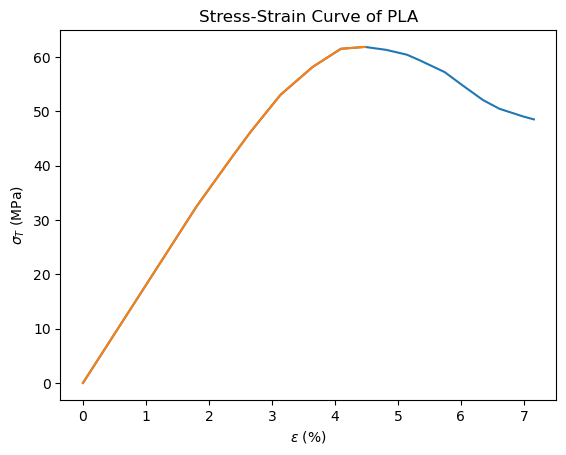

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

stress_strain = pd.read_excel('PLA stress-strain.xlsx')
plt.plot(stress_strain['x'], stress_strain['y (MPa)'])
plt.xlabel('$\epsilon$ (%)')
plt.ylabel('$\sigma_T$ (MPa)')
plt.title("Stress-Strain Curve of PLA")

stress_strain = stress_strain.iloc[:8]
plt.plot(stress_strain['x'], stress_strain['y (MPa)'])

In [18]:
from ansys.mapdl import reader as pymapdl_reader
result = pymapdl_reader.read_binary(f"result/kagome_h_wall/res_n2_r30_0_30.rst")

In [22]:
import pyvista as pv
# 기본적으로 plot이 안돼서 html로 plot하도록 만듦
pv.set_jupyter_backend('html')
pv.start_xvfb()

In [23]:
result.plot_principal_nodal_stress(
    0,
    "S1",
    show_displacement = True,
    displacement_factor = 10,
    cpos="xy",
    background="w",
    text_color="k",
    add_text=True,
    show_edges=True,
)

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

## Mesh Size에 따른 Stress-Strain

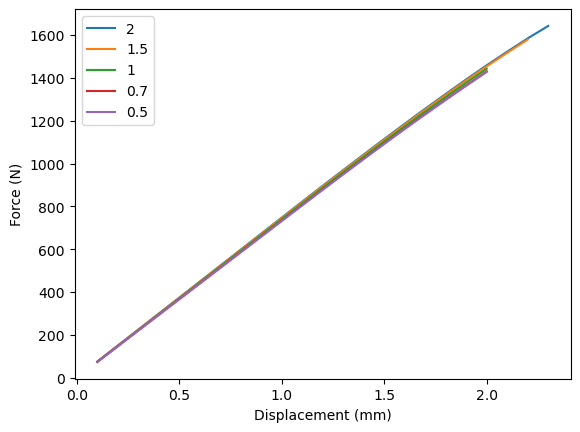

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
for mesh_size in [2, 1.5, 1, 0.7, 0.5, 0.3]:
    try:
        df = pd.read_csv(f"result/kagome/stress_strain_{mesh_size:1.2f}".replace(".", "_")+".csv")
        plt.plot(df['displacement']*1000, df['force'], label = mesh_size)
    except:
        pass
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()

**구조: Kagome, cell 개수: 5, 상대밀도: 0.5, type: SOLID187**
- mesh가 작을수록 fracture point 줄어듦
- mesh에 따른 차이는 크지 않음

## 2DMesh와 3DMesh 비교

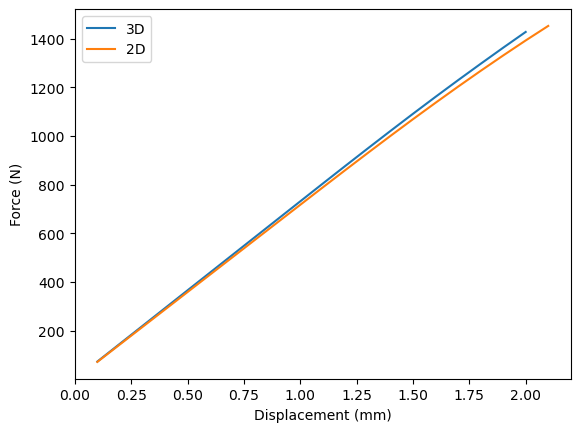

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(f"result/kagome/stress_strain_0_50.csv")
plt.plot(df['displacement']*1000, df['force'], label = "3D")

df = pd.read_csv(f"result/kagome/stress_strain_2d_0_30.csv")
plt.plot(df['displacement']*1000, df['force'], label = "2D")


plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()

**구조: Kagome, cell 개수: 5, 상대밀도: 0.5**  
**mesh type: PLANE183 (2차원), SOLID187 (3차원)**
- fracture point가 조금 늦어졌지만, 개형은 비슷함
- 시간은 10배 이상 빠름

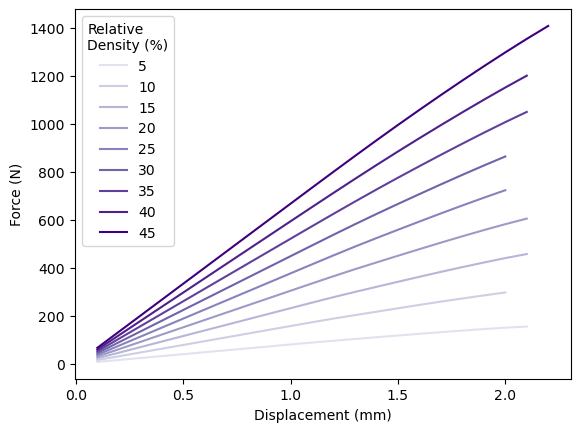

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# plt.figure(dpi=400)
colors = mpl.colormaps['Purples'](np.linspace(0.2, 1, len(np.arange(0.05, 0.5, 0.05))))

for i, r in enumerate(np.arange(0.05, 0.5, 0.05)):
    try:
        df = pd.read_csv(f"result/kagome_h_wall/stress_strain_n3_r{int(r*100)}_0_30.csv")
        plt.plot(df['displacement']*1000, df['force'], label = int(r*100), color = colors[i])
    except:
        pass

plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend(title = 'Relative\nDensity (%)')

## Kagome: Parameter에 따른 분석

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # # Rotate the tick labels and set their alignment.
    # plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
    #          rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [35]:
max_elongation_df = pd.DataFrame([])
UTS_df = pd.DataFrame([])
fracture_energy_df = pd.DataFrame([])
elastic_modulus_df = pd.DataFrame([])

design_width = 60/1000
design_height = 25/1000
total_width = 144/1000
total_z = 5/1000

for n_cell in range(2, 8):
    max_elongation_dict = {}
    UTS_dict = {}
    fracture_energy_dict = {}
    elastic_modulus_dict = {}
    for relative_density in np.arange(0.05, 0.55, 0.05):
        try:
            df = pd.read_csv(f'result/kagome_h_wall/stress_strain_n{n_cell}_r{int(relative_density*100)}_0_30.csv')

            # max elongation
            max_elongation_dict[relative_density] = df['displacement'].max()  # m
            # UTS
            UTS_dict[relative_density] = df['force'].max()  # N
            # fracture energy
            d_displacement = df.iloc[1:].reset_index()['displacement'] - df.iloc[:-1].reset_index()['displacement']
            d_displacement.loc[d_displacement.index.max()+1] = d_displacement.loc[d_displacement.index.max()]
            fracture_energy_dict[relative_density] = (d_displacement*df['force']).sum()  # J
            # elastic modulus
            x = df['displacement'][:3]
            y = df['force'][:3]
            elastic_modulus, _ = np.polyfit(x, y, 1)
            elastic_modulus_dict[relative_density] = elastic_modulus  # N/m
        except:
            max_elongation_dict[relative_density] = 0
            UTS_dict[relative_density] = 0
            fracture_energy_dict[relative_density] = 0
            elastic_modulus_dict[relative_density] = 0

    max_elongation_df[n_cell] = max_elongation_dict
    UTS_df[n_cell] = UTS_dict
    fracture_energy_df[n_cell] = fracture_energy_dict
    elastic_modulus_df[n_cell] = elastic_modulus_dict

In [30]:
df['force'].sum()

17028.755599999997

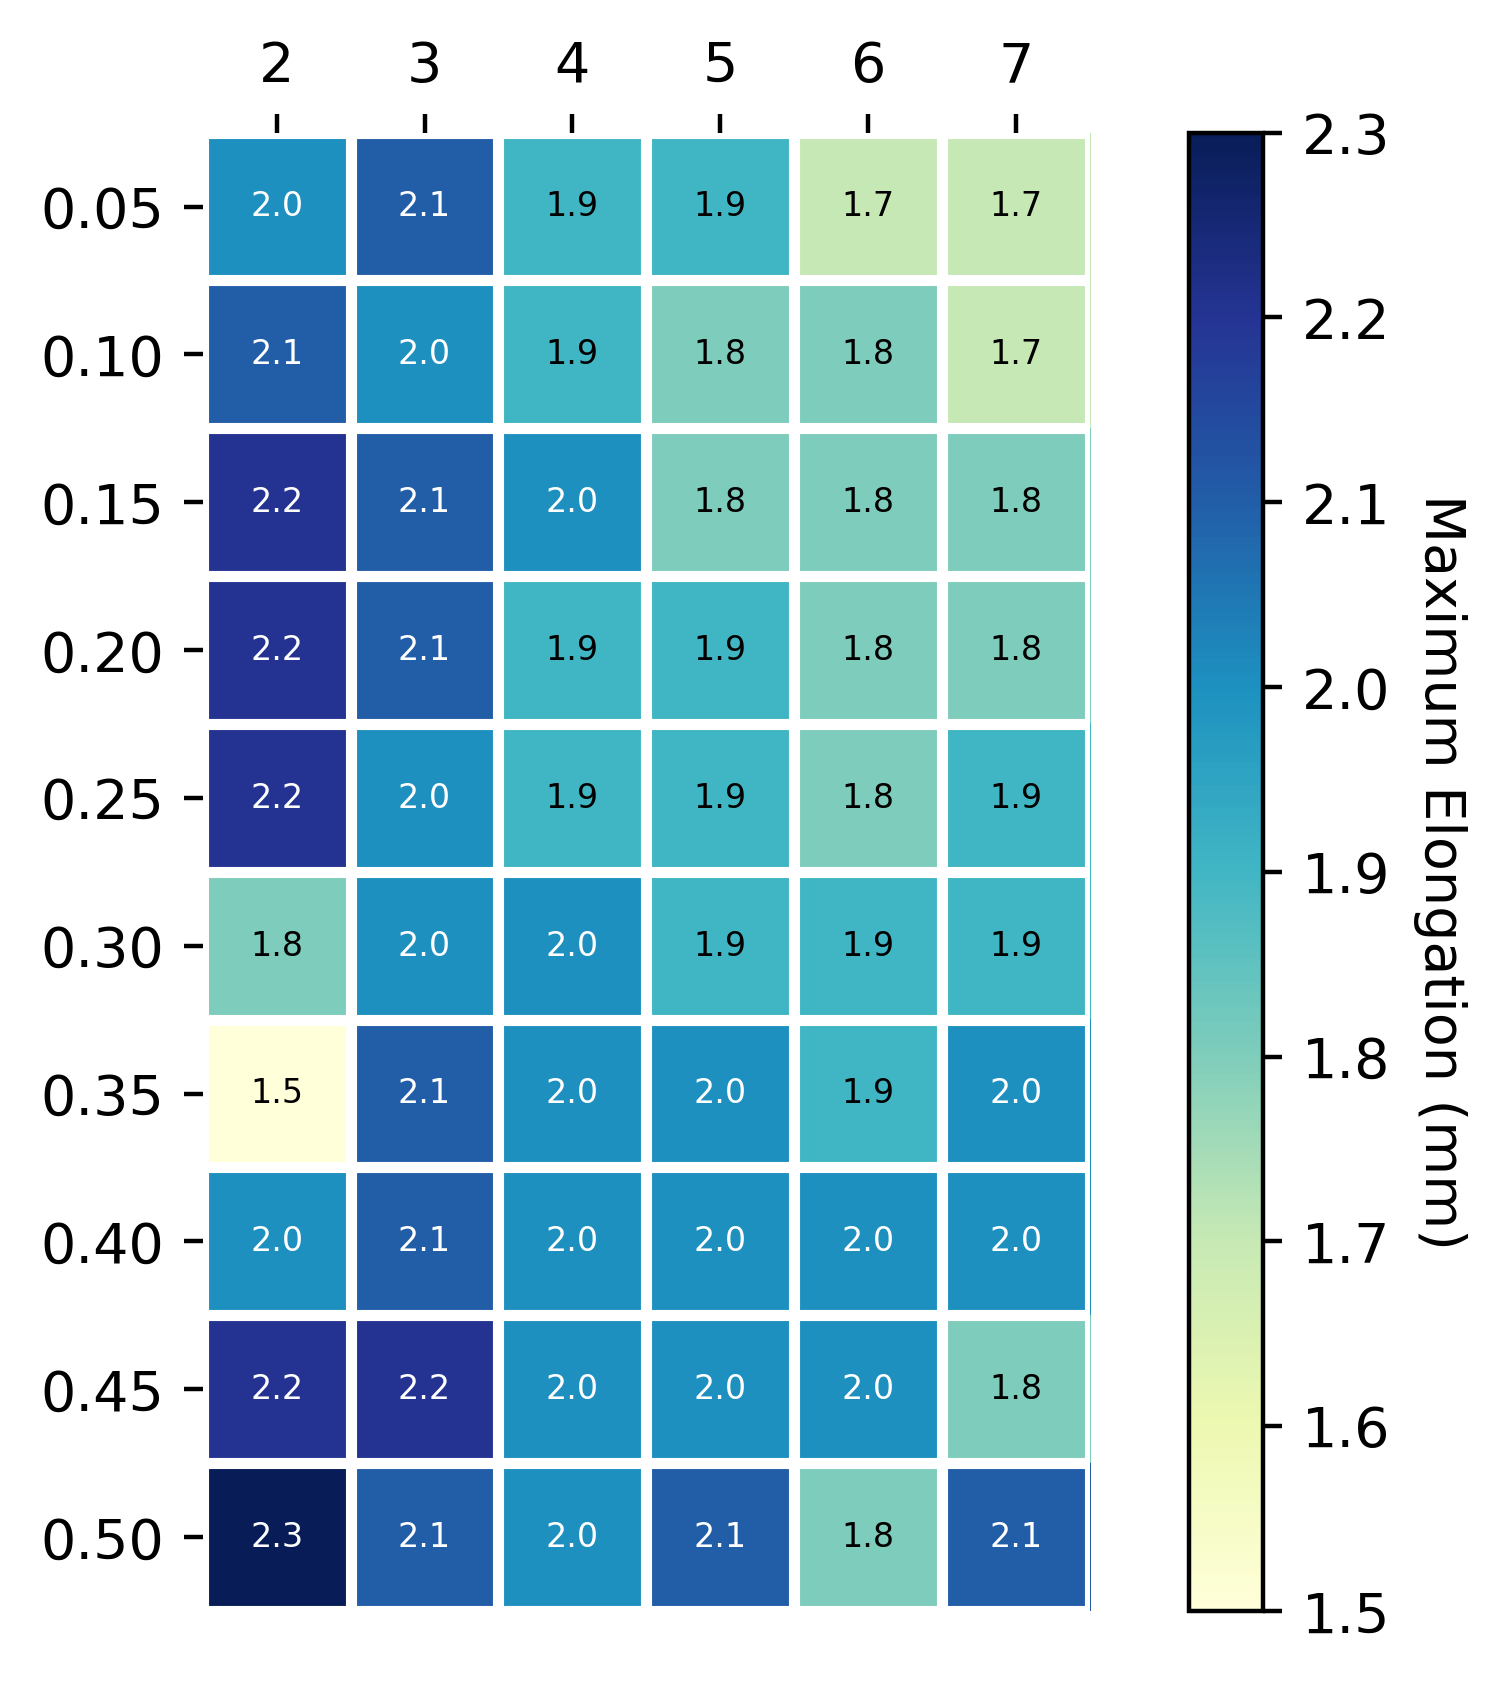

In [ ]:
fig, ax = plt.subplots()
fig.set_dpi(400)
im, cbar = heatmap((max_elongation_df.values*1000),
                   max_elongation_df.index.map(lambda x: f"{x:.2f}"),
                   max_elongation_df.columns,
                   ax=ax, cmap="YlGnBu", cbarlabel="Maximum Elongation (mm)")
texts = annotate_heatmap(im, valfmt="{x:1.1f}", size=6)

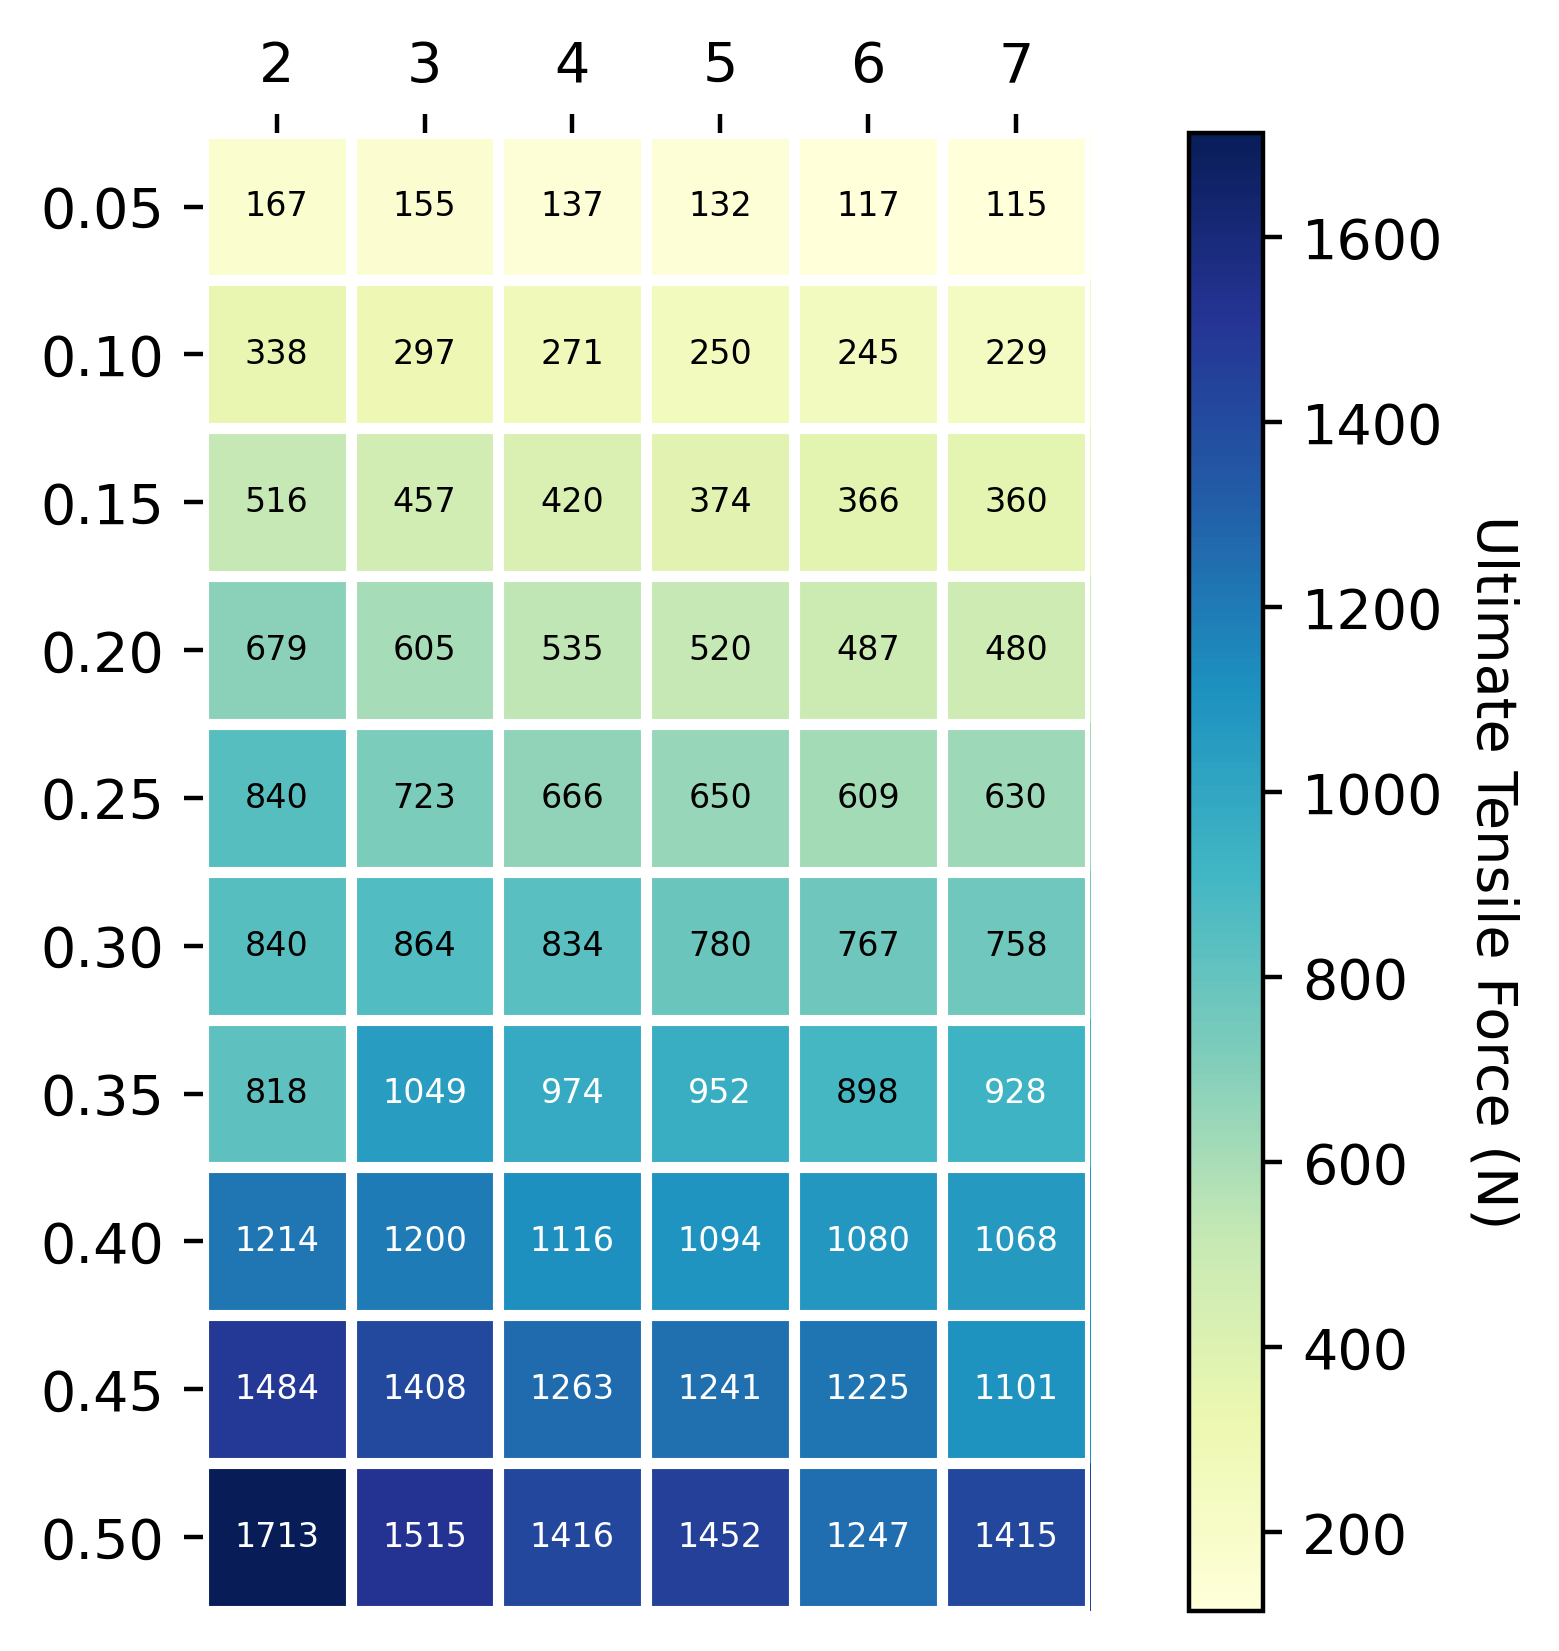

In [38]:
fig, ax = plt.subplots()
fig.set_dpi(400)
im, cbar = heatmap(UTS_df.values.astype(int),
                   UTS_df.index.map(lambda x: f"{x:.2f}"),
                   UTS_df.columns,
                   ax=ax, cmap="YlGnBu", cbarlabel="Ultimate Tensile Force (N)")
texts = annotate_heatmap(im, valfmt="{x:d}", size=6)

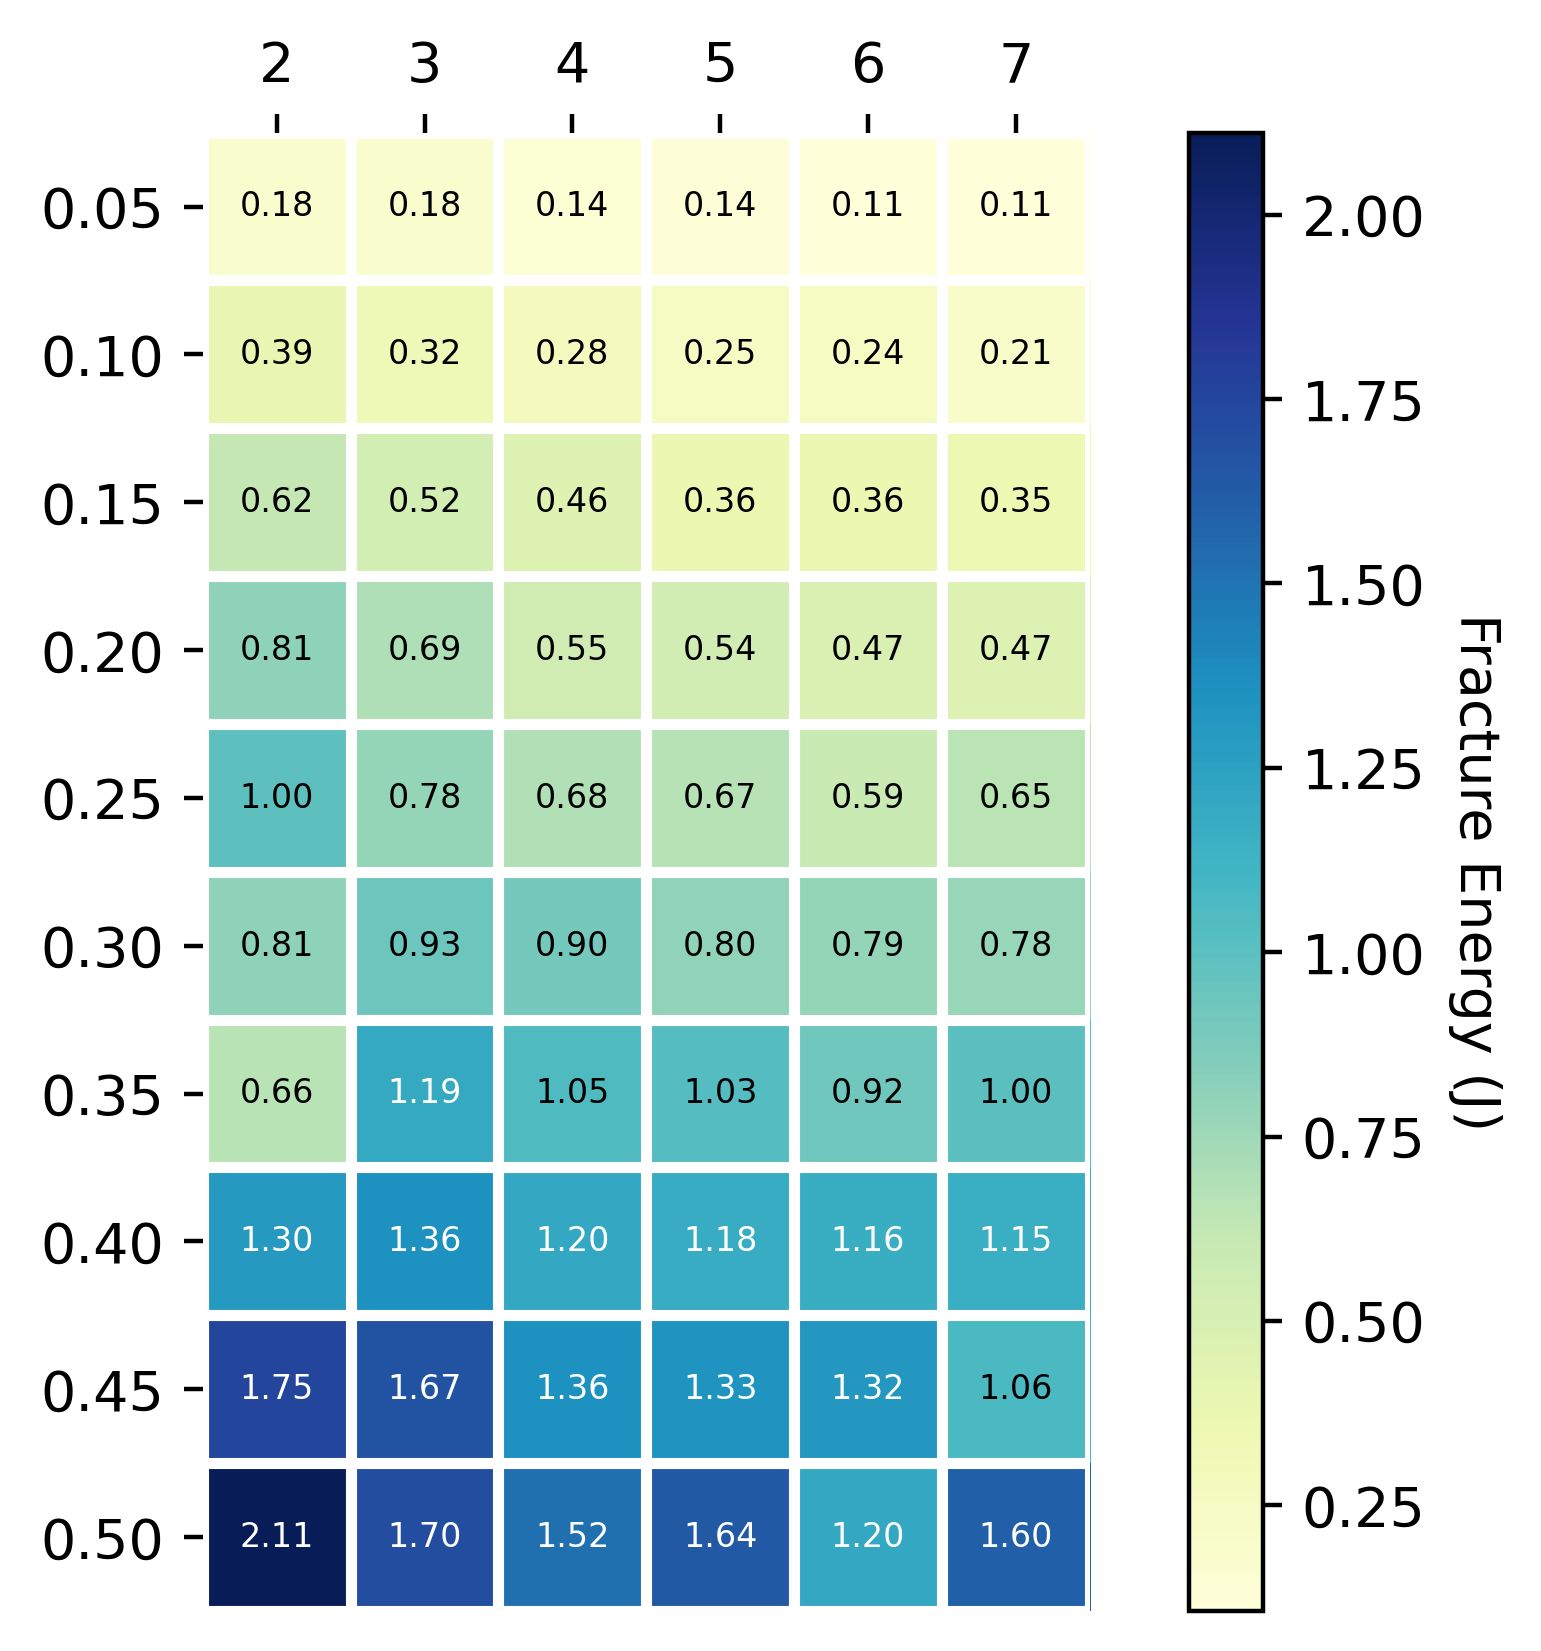

In [97]:
fig, ax = plt.subplots()
fig.set_dpi(400)
im, cbar = heatmap(fracture_energy_df.values,
                   fracture_energy_df.index.map(lambda x: f"{x:.2f}"),
                   fracture_energy_df.columns,
                   ax=ax, cmap="YlGnBu", cbarlabel="Fracture Energy (J)")
texts = annotate_heatmap(im, valfmt="{x:.2f}", size=6)

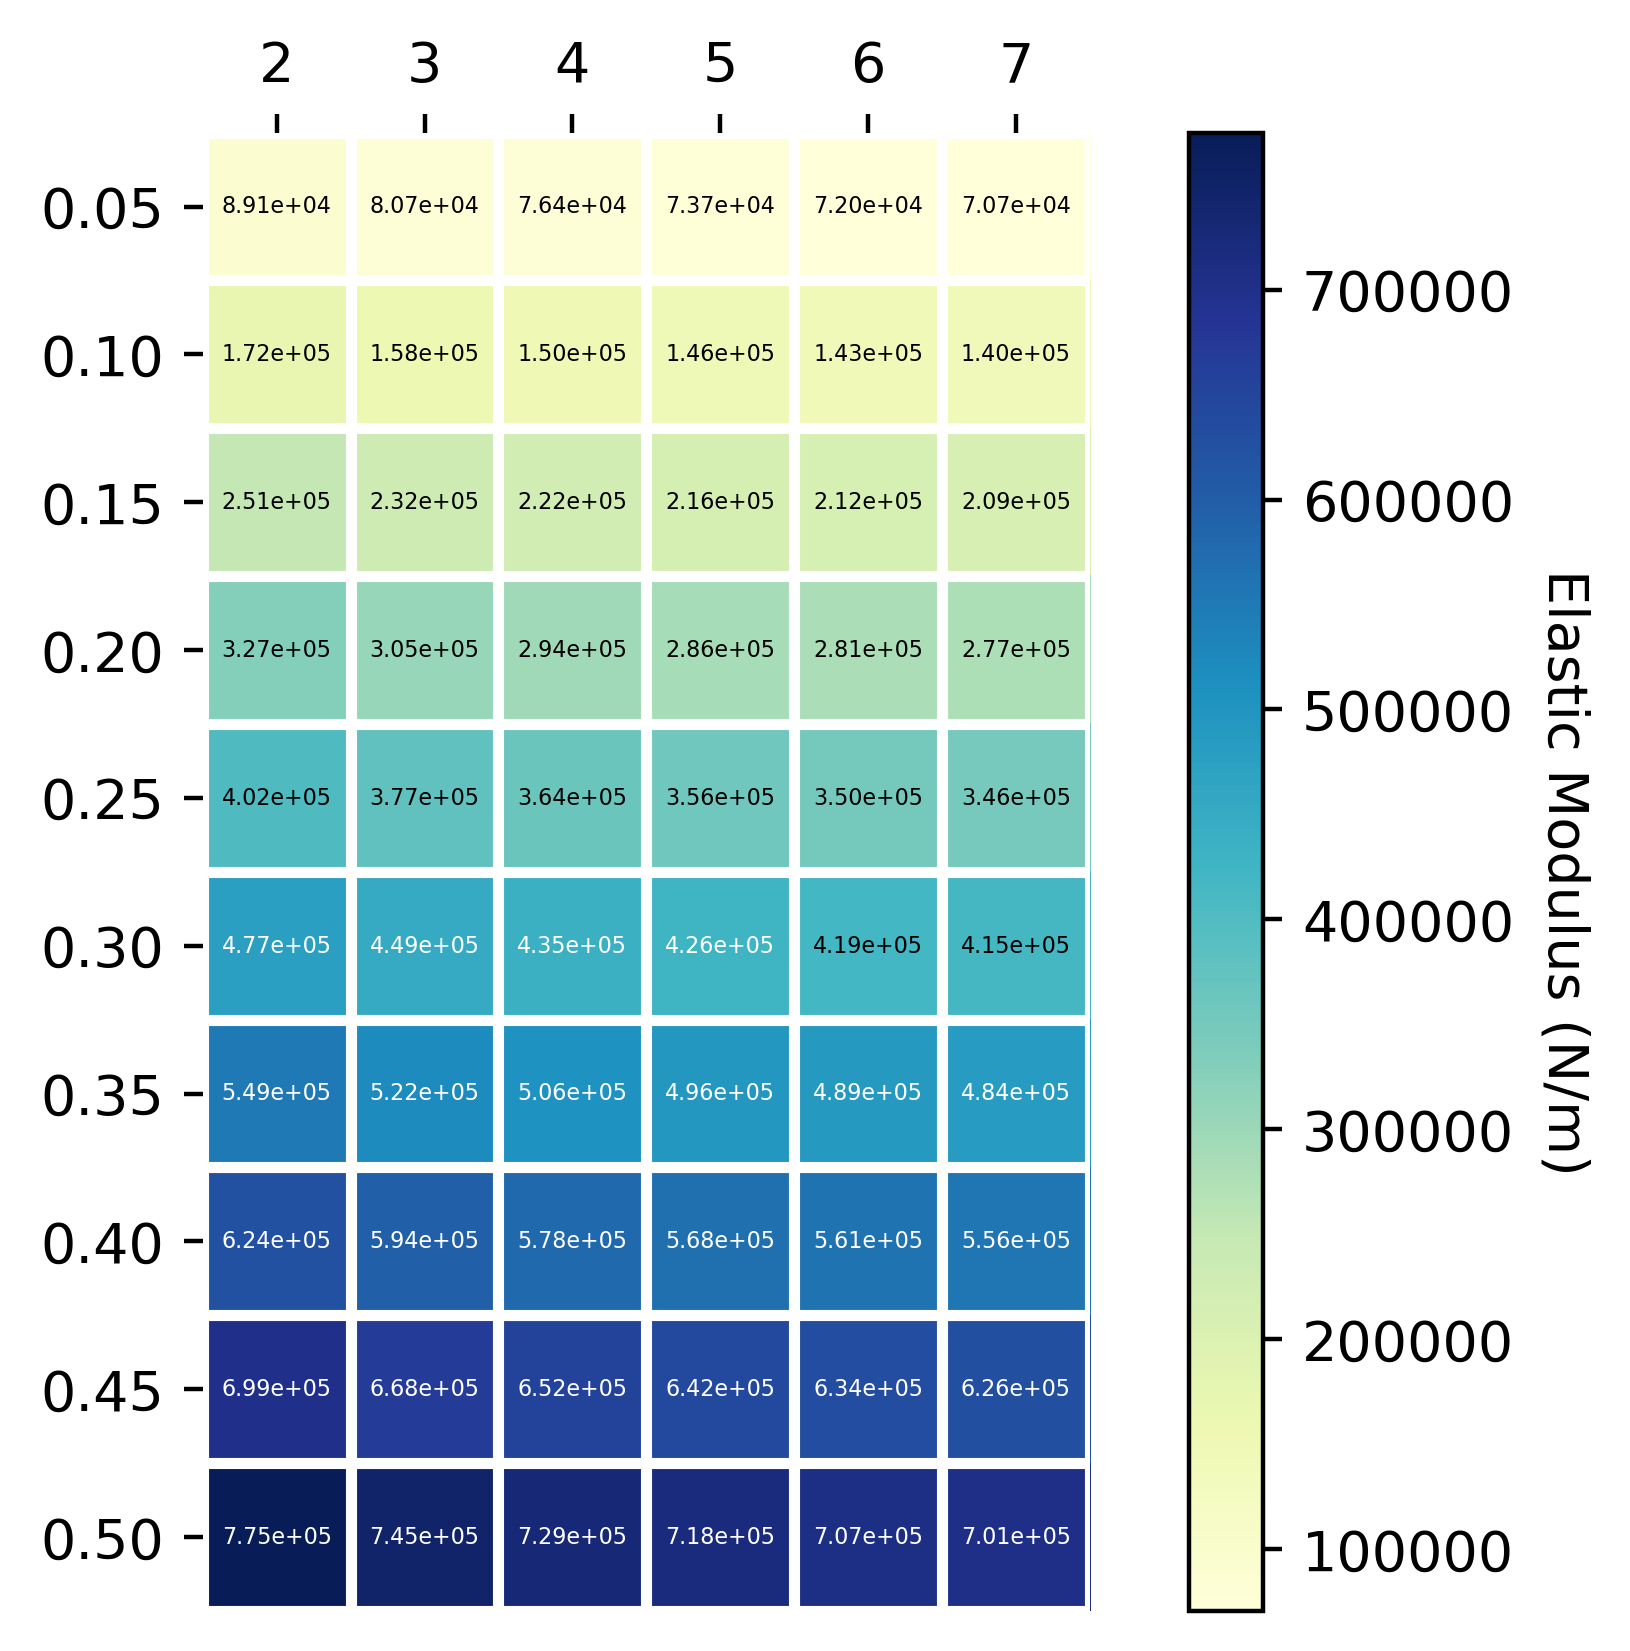

In [92]:
fig, ax = plt.subplots()
fig.set_dpi(400)
im, cbar = heatmap(elastic_modulus_df.values,
                   elastic_modulus_df.index.map(lambda x: f"{x:.2f}"),
                   elastic_modulus_df.columns,
                   ax=ax, cmap="YlGnBu", cbarlabel="Elastic Modulus (N/m)")
texts = annotate_heatmap(im, valfmt="{x:.2e}", size=4)

### Density 추가

In [18]:
from ansys.mapdl.core import launch_mapdl
try:
    mapdl = launch_mapdl(start_instance=False, port=50052)
except:
    mapdl = launch_mapdl(start_instance=True, port=50052)

In [25]:
import os
import numpy as np
import pandas as pd

current_dir = os.getcwd()

density_df = pd.DataFrame([])
for n_cell in range(2, 8):
    density_dict = {}
    for relative_density in np.arange(0.05, 0.55, 0.05):
        mapdl.finish()
        mapdl.clear()
        mapdl.prep7()
        mapdl.resume(fname=f"{current_dir}/result/kagome_h_wall/db_n{n_cell}_r{int(relative_density*100)}_0_30", ext="db")
        mapdl.allsel()
        mapdl.asum()
        density_dict[relative_density] = mapdl.get(entity="AREA", entnum=0, item1="AREA")
        print(f"n_cell: {n_cell}, r: {relative_density} Done")

    density_df[n_cell] = density_dict

n_cell: 2, r: 0.05 Done
n_cell: 2, r: 0.1 Done
n_cell: 2, r: 0.15000000000000002 Done
n_cell: 2, r: 0.2 Done
n_cell: 2, r: 0.25 Done
n_cell: 2, r: 0.3 Done
n_cell: 2, r: 0.35000000000000003 Done
n_cell: 2, r: 0.4 Done
n_cell: 2, r: 0.45 Done
n_cell: 2, r: 0.5 Done
n_cell: 3, r: 0.05 Done
n_cell: 3, r: 0.1 Done
n_cell: 3, r: 0.15000000000000002 Done
n_cell: 3, r: 0.2 Done
n_cell: 3, r: 0.25 Done
n_cell: 3, r: 0.3 Done
n_cell: 3, r: 0.35000000000000003 Done
n_cell: 3, r: 0.4 Done
n_cell: 3, r: 0.45 Done
n_cell: 3, r: 0.5 Done
n_cell: 4, r: 0.05 Done
n_cell: 4, r: 0.1 Done
n_cell: 4, r: 0.15000000000000002 Done
n_cell: 4, r: 0.2 Done
n_cell: 4, r: 0.25 Done
n_cell: 4, r: 0.3 Done
n_cell: 4, r: 0.35000000000000003 Done
n_cell: 4, r: 0.4 Done
n_cell: 4, r: 0.45 Done
n_cell: 4, r: 0.5 Done
n_cell: 5, r: 0.05 Done
n_cell: 5, r: 0.1 Done
n_cell: 5, r: 0.15000000000000002 Done
n_cell: 5, r: 0.2 Done
n_cell: 5, r: 0.25 Done
n_cell: 5, r: 0.3 Done
n_cell: 5, r: 0.35000000000000003 Done
n_cell: 5,

In [26]:
design_width = 60/1000
design_height = 25/1000
total_width = 144/1000
total_z = 5/1000

In [31]:
density_df = density_df/total_width/design_height
density_df

,2,3,4,5,6,7
0.05,0.607510,0.606198,0.605845,0.605399,0.605282,0.605072
0.10,0.631401,0.628851,0.628248,0.627357,0.627151,0.626764
0.15,0.655020,0.651300,0.650551,0.649198,0.648944,0.648416
0.20,0.678424,0.673557,0.672585,0.671040,0.670670,0.669991
0.25,0.701626,0.695491,0.694513,0.692848,0.692317,0.691505
0.30,0.724336,0.717345,0.716413,0.714629,0.713767,0.713036
0.35,0.746320,0.739503,0.738233,0.736122,0.735267,0.734532
0.40,0.768278,0.761815,0.759652,0.757737,0.756705,0.755724
0.45,0.790421,0.783582,0.781038,0.779390,0.777760,0.776715
0.50,0.811655,0.805417,0.802431,0.800477,0.798638,0.797756


In [32]:
density_df.to_csv('result/density/density_kagome_wall.csv')

In [ ]:
texts = annotate_heatmap(im, valfmt="{x:.2e}", size=4)

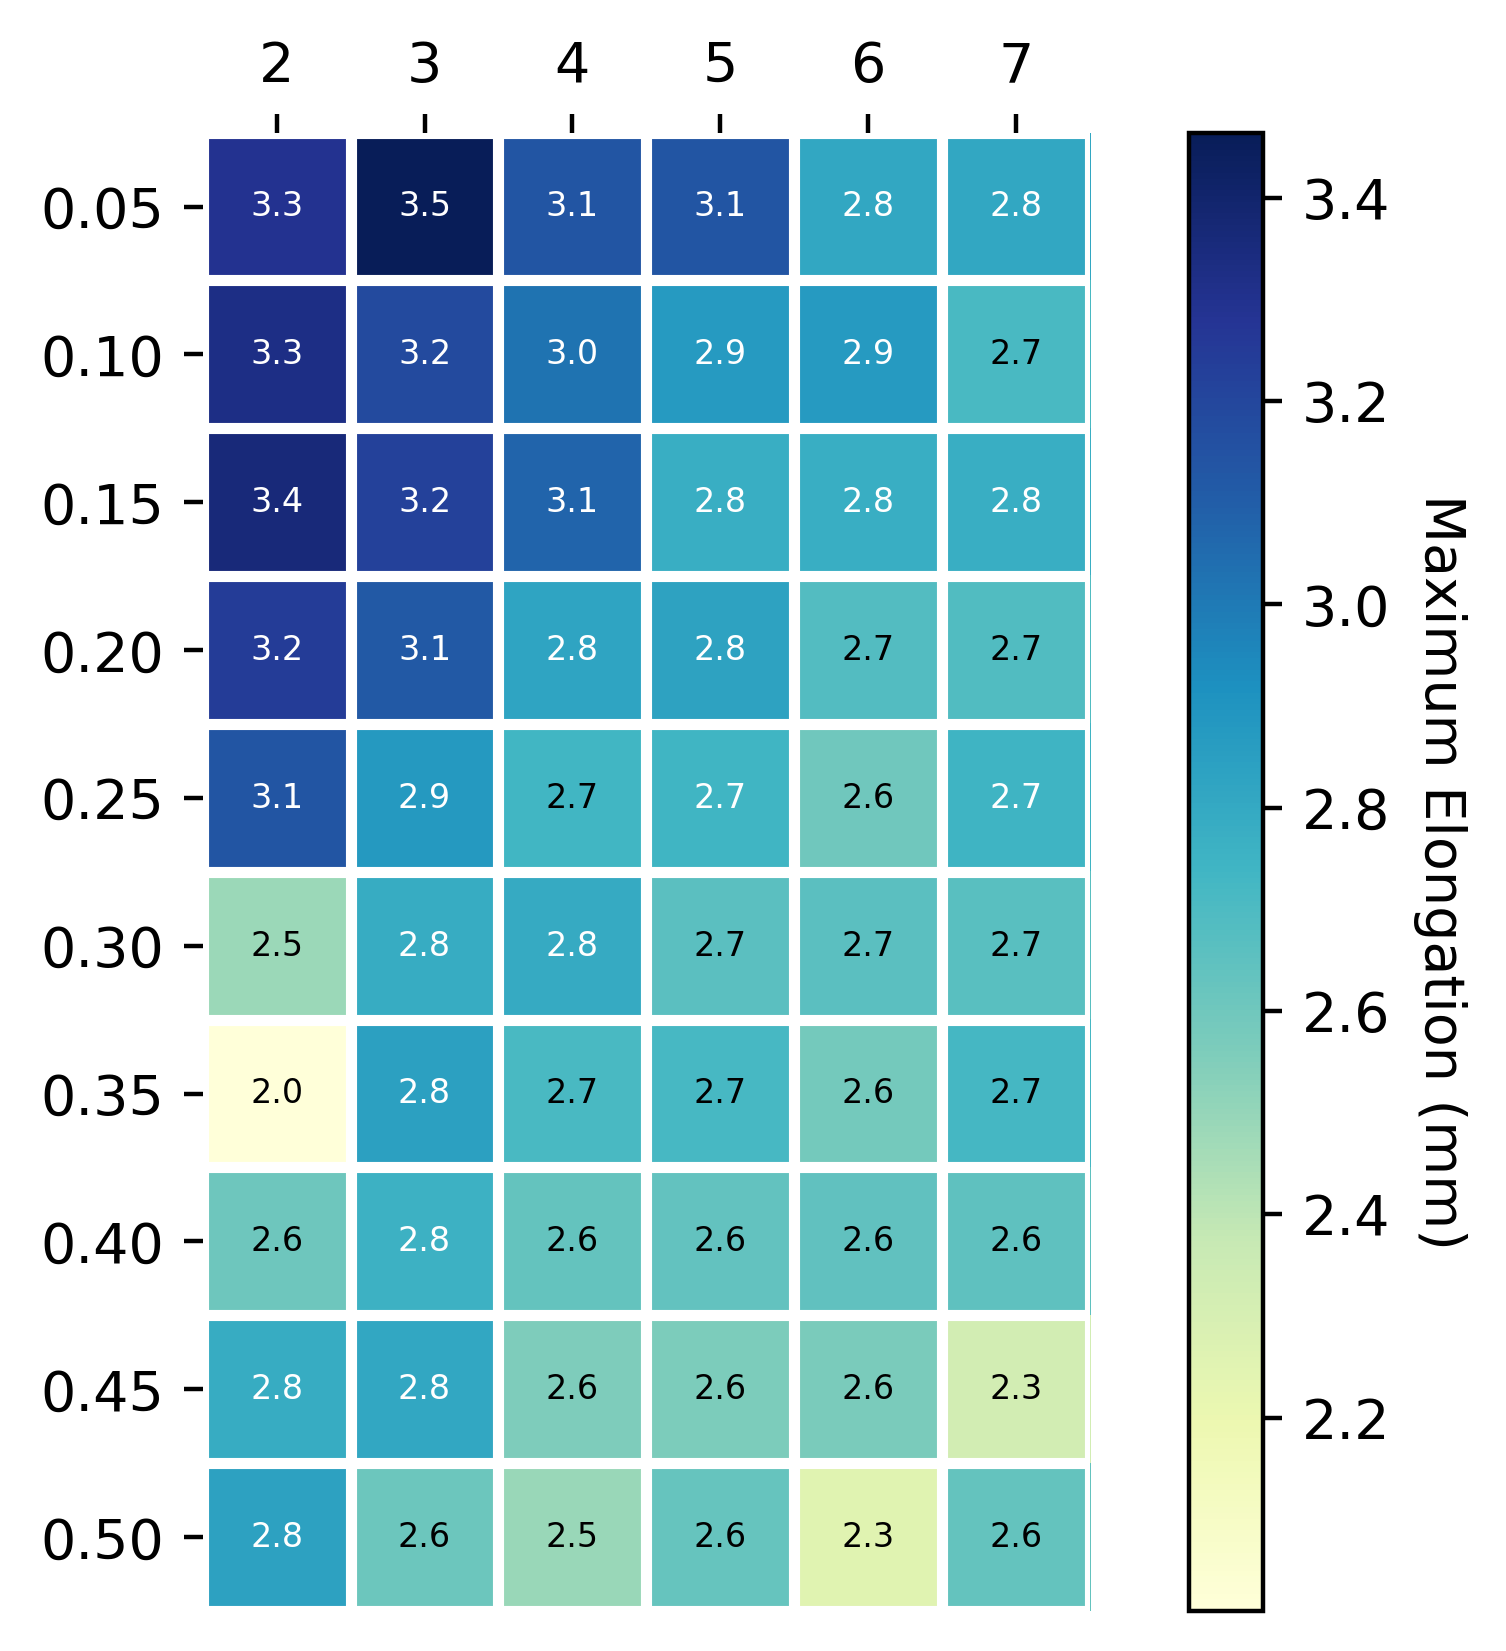

In [36]:
fig, ax = plt.subplots()
fig.set_dpi(400)
im, cbar = heatmap((max_elongation_df.values*1000/density_df.values),
                   max_elongation_df.index.map(lambda x: f"{x:.2f}"),
                   max_elongation_df.columns,
                   ax=ax, cmap="YlGnBu", cbarlabel="Maximum Elongation (mm)")
texts = annotate_heatmap(im, valfmt="{x:1.1f}", size=6)

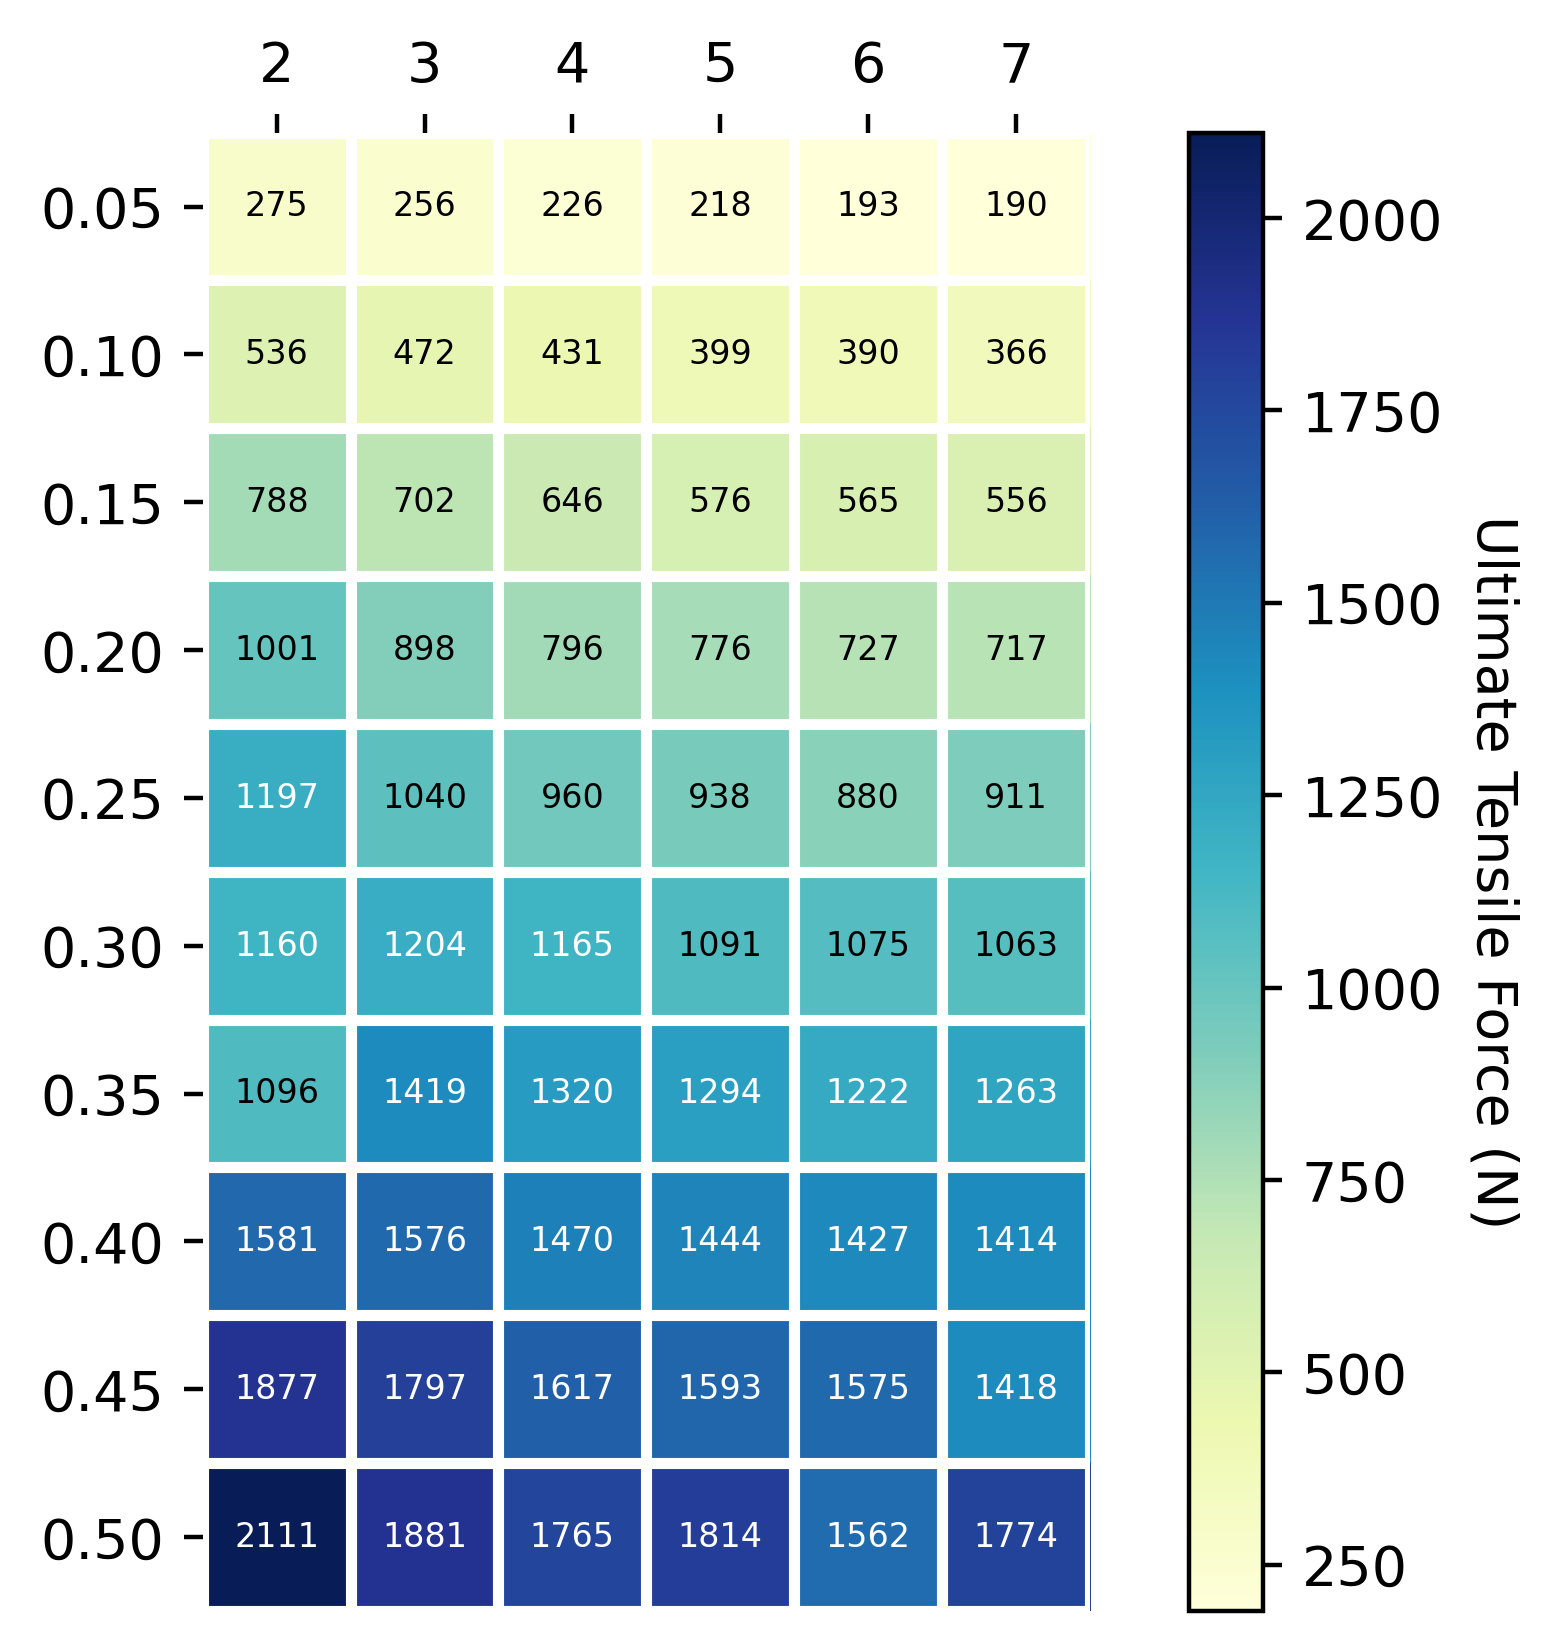

In [39]:
fig, ax = plt.subplots()
fig.set_dpi(400)
im, cbar = heatmap((UTS_df.values/density_df.values).astype(int),
                   UTS_df.index.map(lambda x: f"{x:.2f}"),
                   UTS_df.columns,
                   ax=ax, cmap="YlGnBu", cbarlabel="Ultimate Tensile Force (N)")
texts = annotate_heatmap(im, valfmt="{x:d}", size=6)

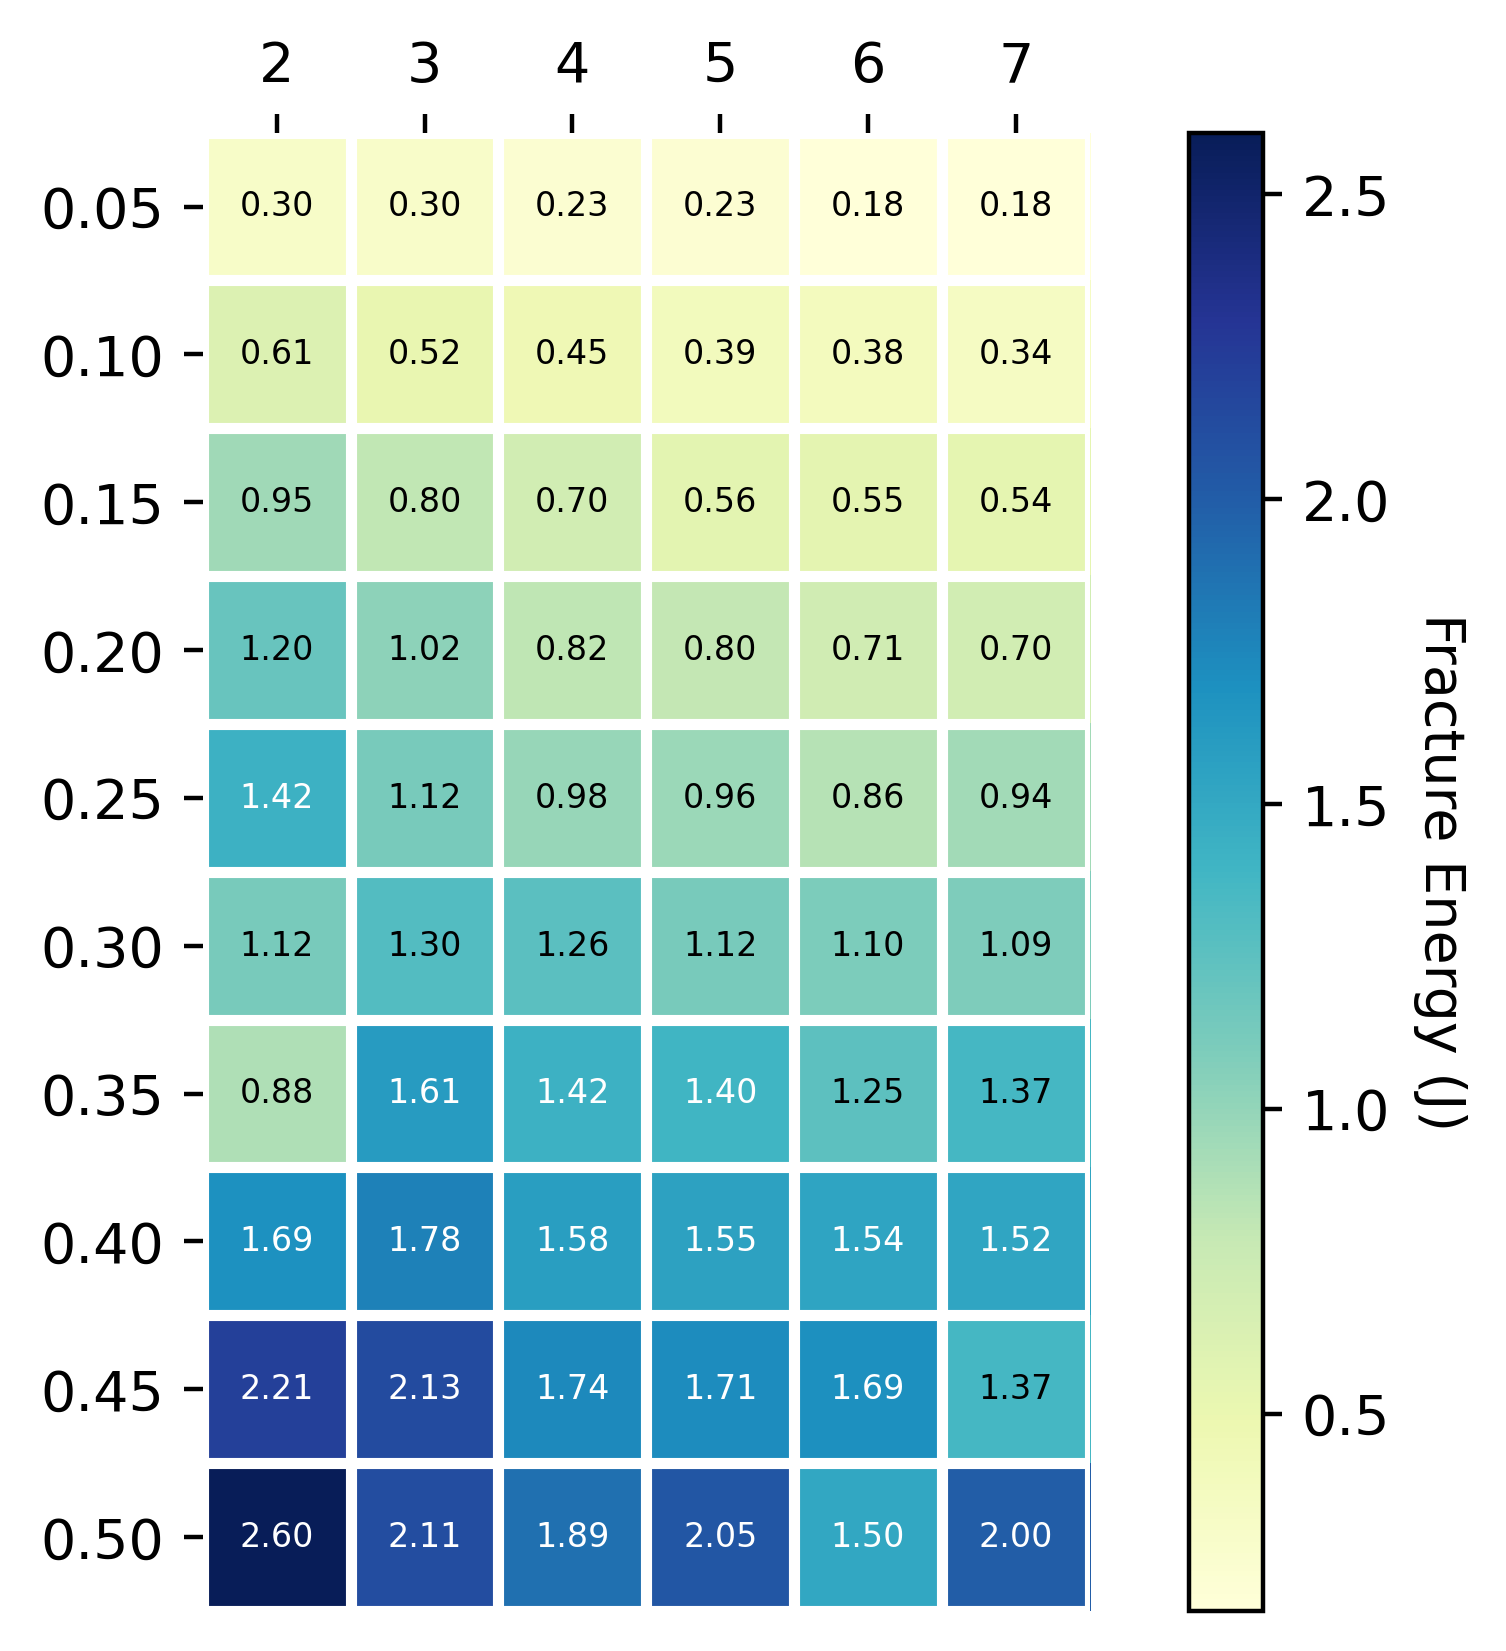

In [41]:
fig, ax = plt.subplots()
fig.set_dpi(400)
im, cbar = heatmap(fracture_energy_df.values/density_df.values,
                   fracture_energy_df.index.map(lambda x: f"{x:.2f}"),
                   fracture_energy_df.columns,
                   ax=ax, cmap="YlGnBu", cbarlabel="Fracture Energy (J)")
texts = annotate_heatmap(im, valfmt="{x:.2f}", size=6)

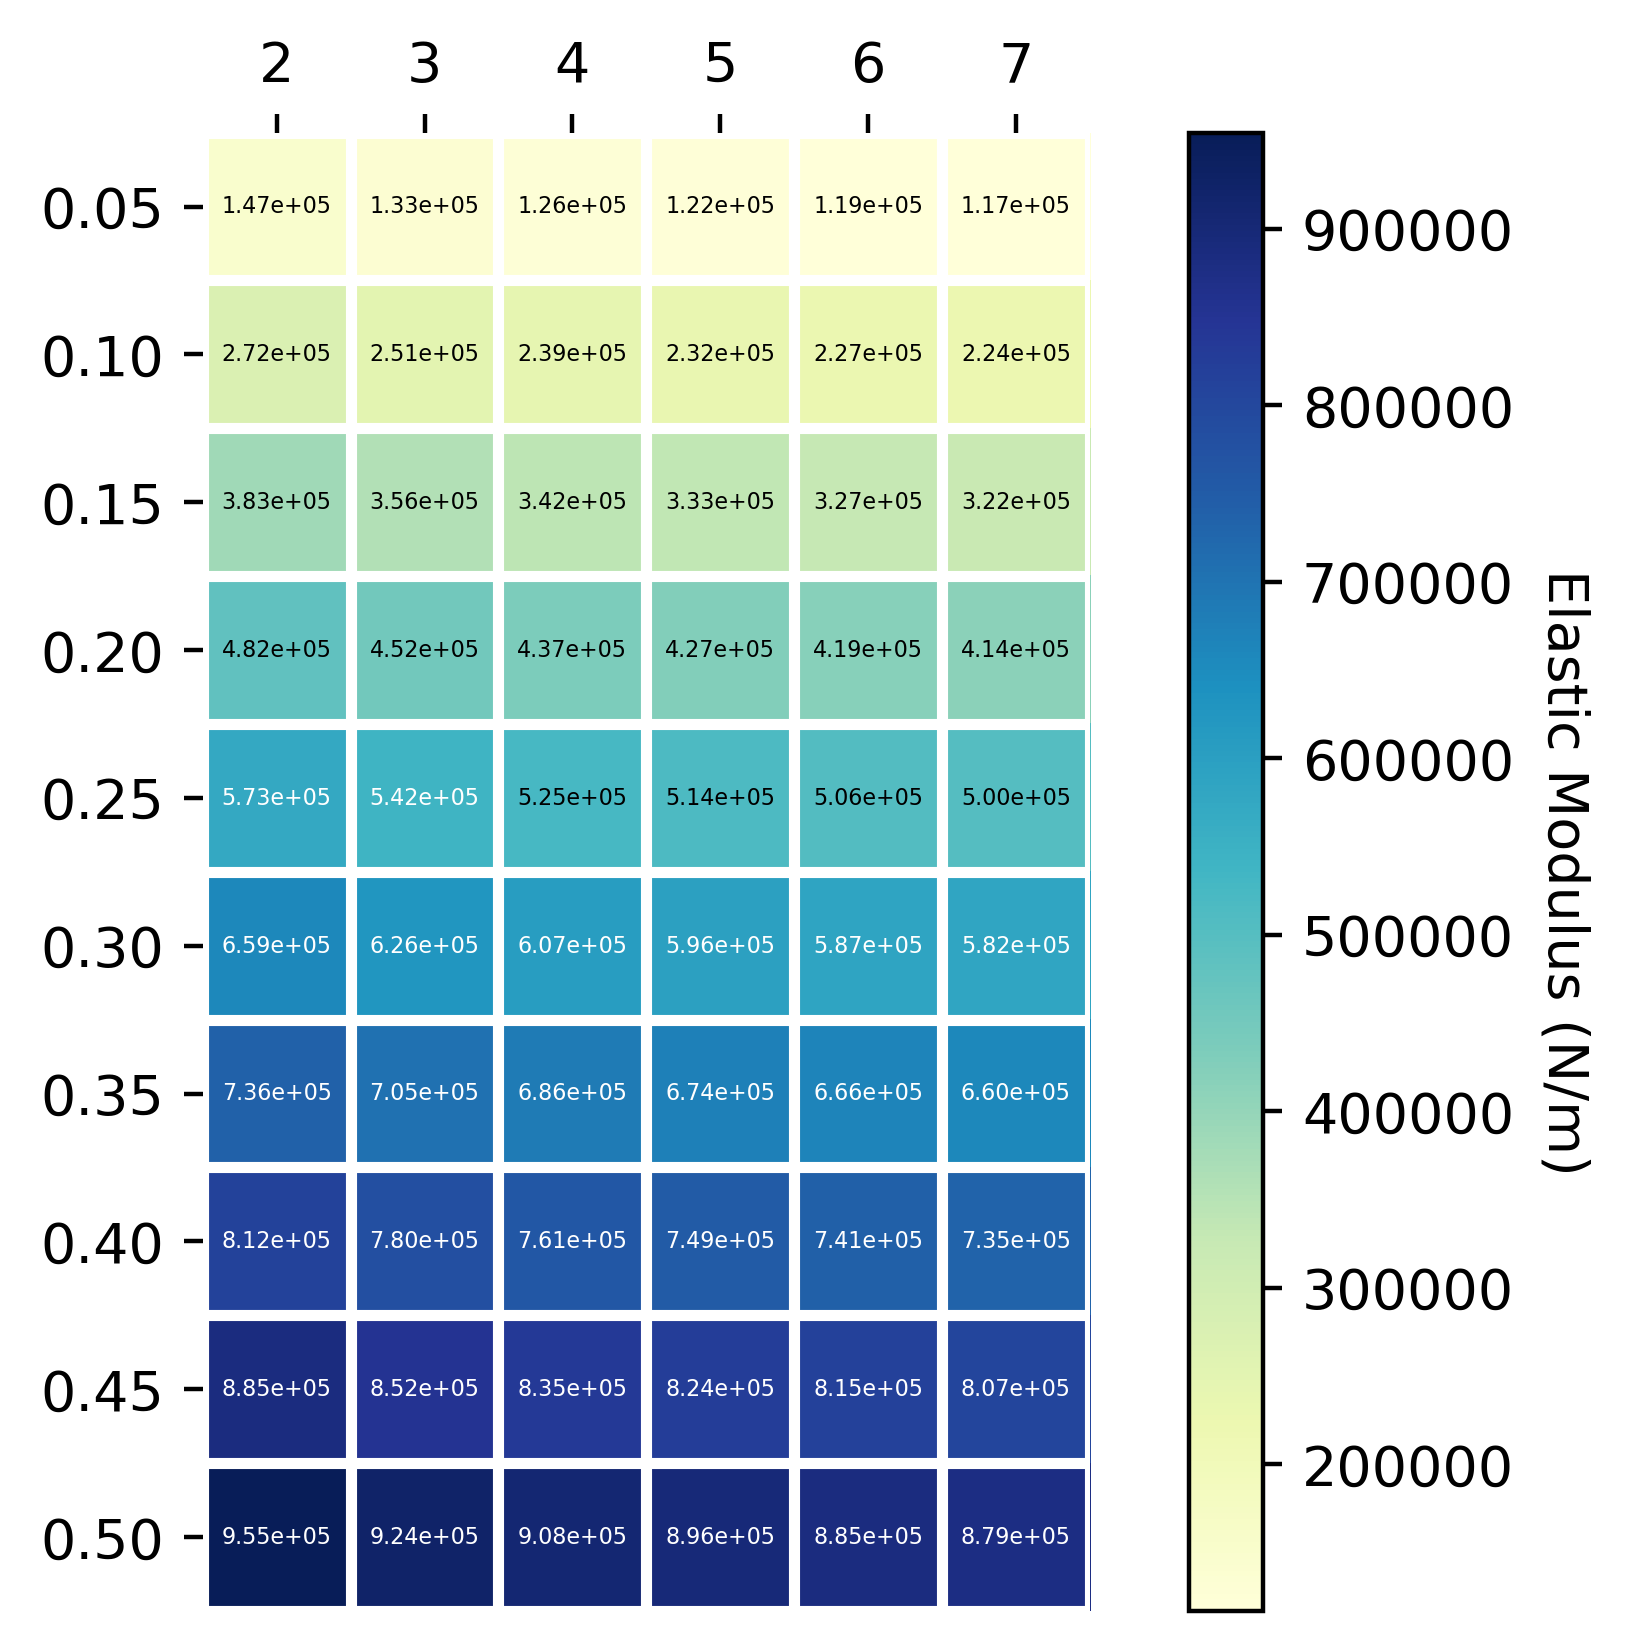

In [42]:
fig, ax = plt.subplots()
fig.set_dpi(400)
im, cbar = heatmap(elastic_modulus_df.values/density_df.values,
                   elastic_modulus_df.index.map(lambda x: f"{x:.2f}"),
                   elastic_modulus_df.columns,
                   ax=ax, cmap="YlGnBu", cbarlabel="Elastic Modulus (N/m)")
texts = annotate_heatmap(im, valfmt="{x:.2e}", size=4)

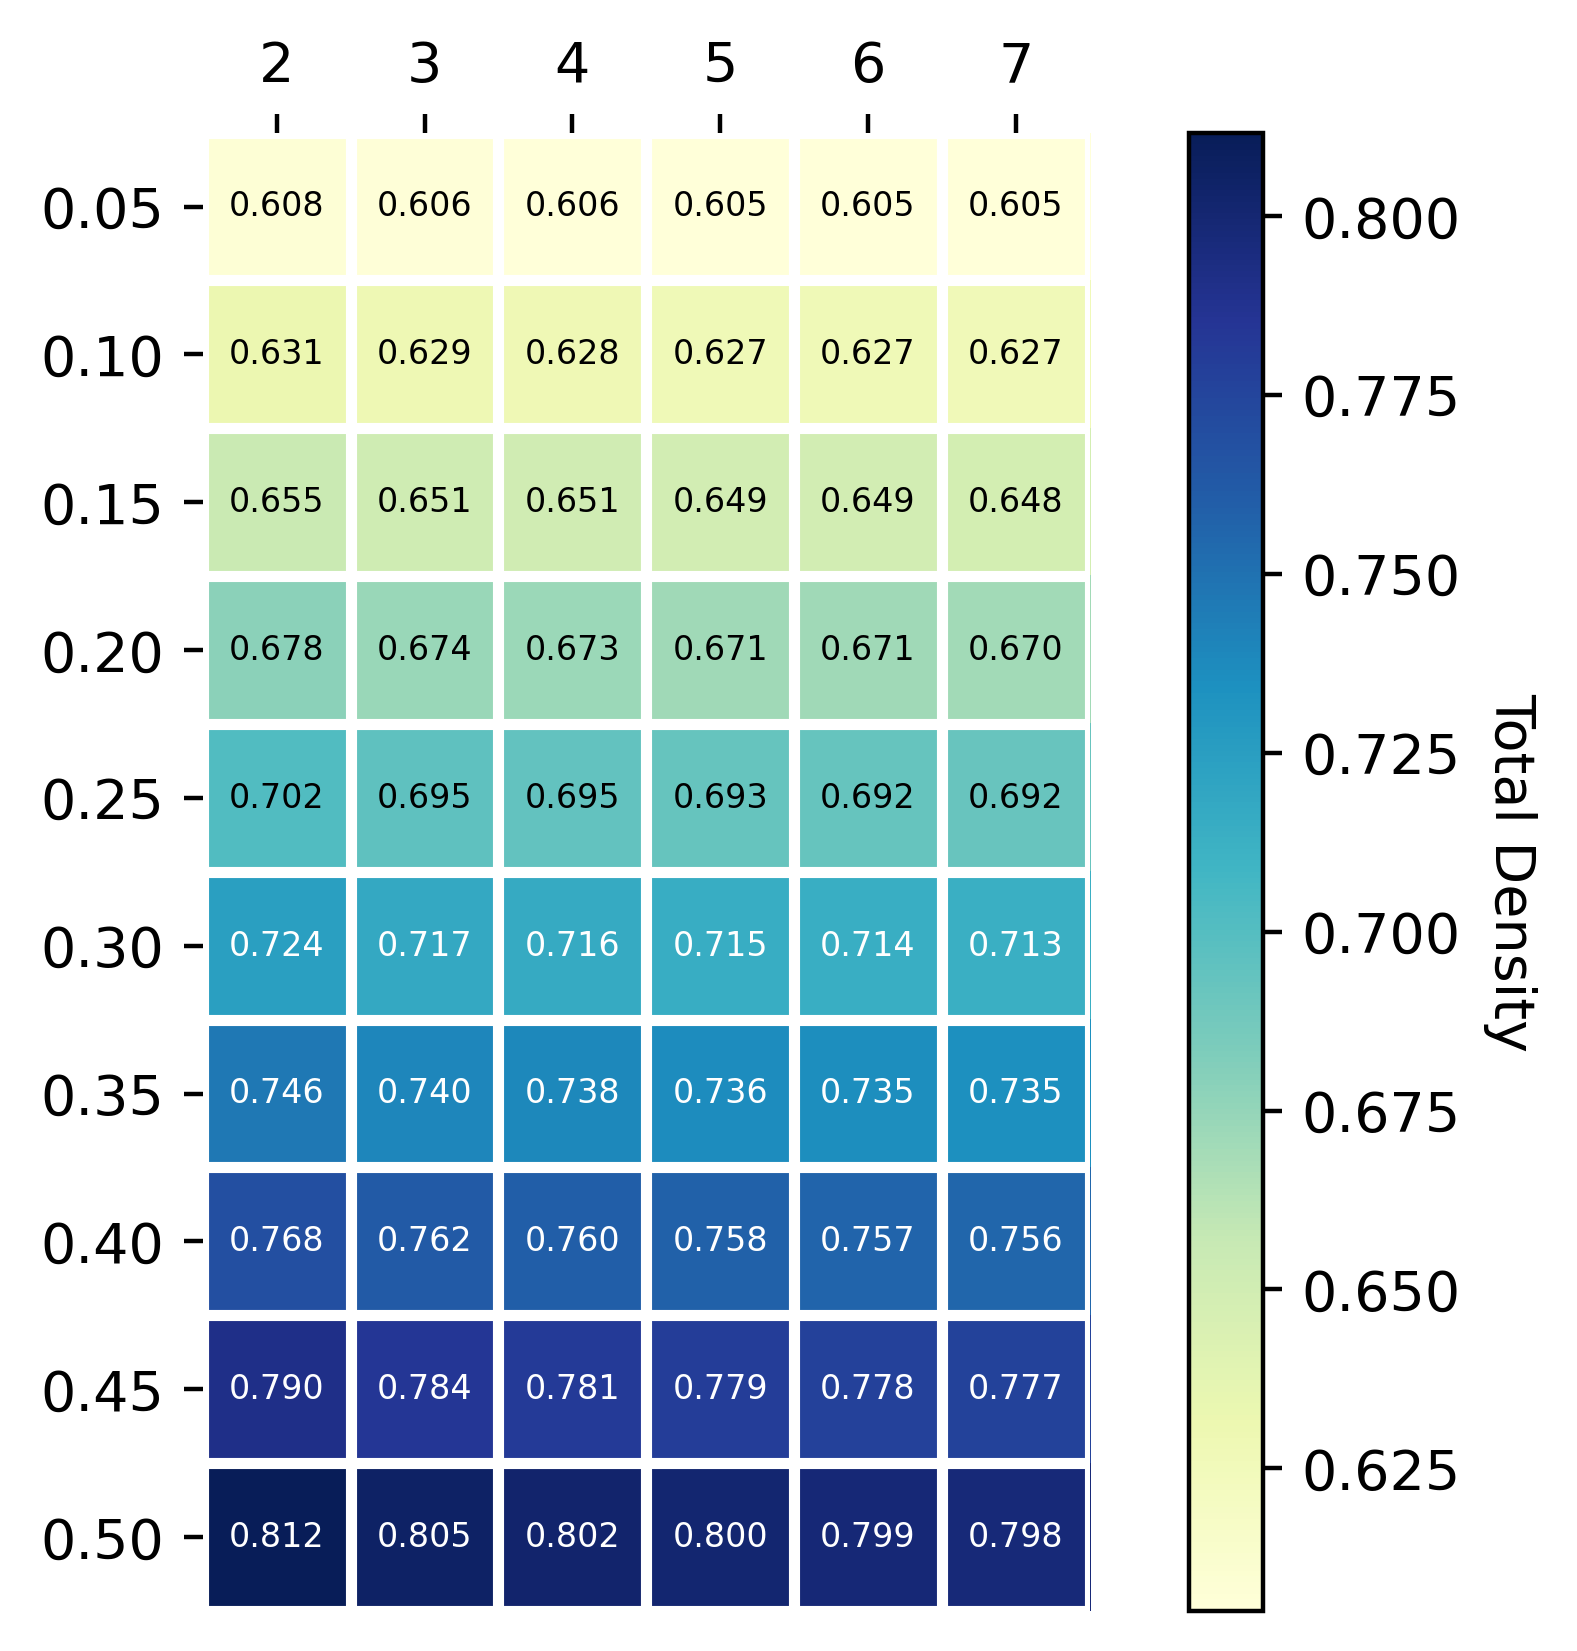

In [45]:
fig, ax = plt.subplots()
fig.set_dpi(400)
im, cbar = heatmap(density_df.values,
                   density_df.index.map(lambda x: f"{x:.2f}"),
                   density_df.columns,
                   ax=ax, cmap="YlGnBu", cbarlabel="Total Density")
texts = annotate_heatmap(im, valfmt="{x:.3f}", size=6)

## 삼각형: Parameter에 따른 분석